<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện

In [29]:
import cv2
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

# Load và xử lý data

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
x_pre = x_test
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Tạo model

In [32]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1 )))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

#ANN
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 128)       

# Compile và train

In [33]:
opt= SGD(lr=0.01,momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 190s 403ms/step - loss: 0.2180 - accuracy: 0.9307 - val_loss: 0.0642 - val_accuracy: 0.9801
Epoch 2/10
469/469 [==============================] - 107s 228ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0439 - val_accuracy: 0.9859
Epoch 3/10
469/469 [==============================] - 103s 219ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 106s 225ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 5/10
469/469 [==============================] - 108s 231ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 114s 243ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0288 - val_accuracy: 0.9904
Epoch 7/10
469/469 [==============================] - 102s 217ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0562 - val_accura

In [34]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0268 - accuracy: 0.9918
Test score: 0.026792049407958984
Test accuracy: 0.9918000102043152


# Vẽ đồ thị

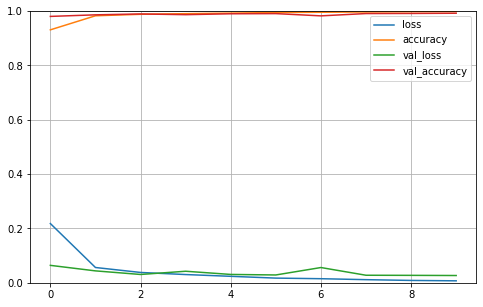

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

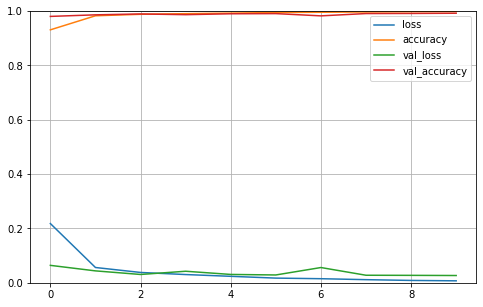

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Kiểm tra

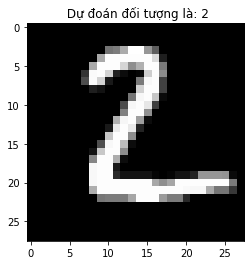

In [38]:
Label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
test = 1
plt.title(" Dự đoán đối tượng là: " + Label[np.argmax(model.predict(x_pre[test].reshape(-1,28,28,1)))])
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

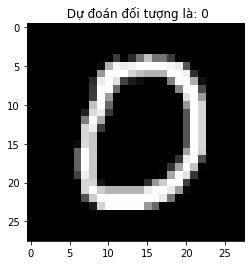

In [39]:
test = 10
plt.title(" Dự đoán đối tượng là: " + Label[np.argmax(model.predict(x_pre[test].reshape(-1,28,28,1)))])
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))